In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

Matplotlib created a temporary cache directory at /jobfs/138895781.gadi-pbs/matplotlib-75drux09 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


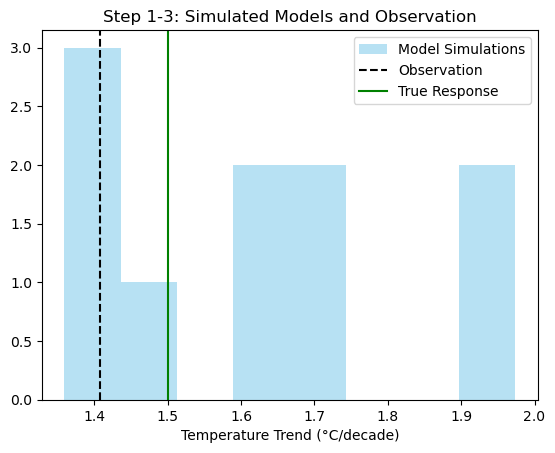

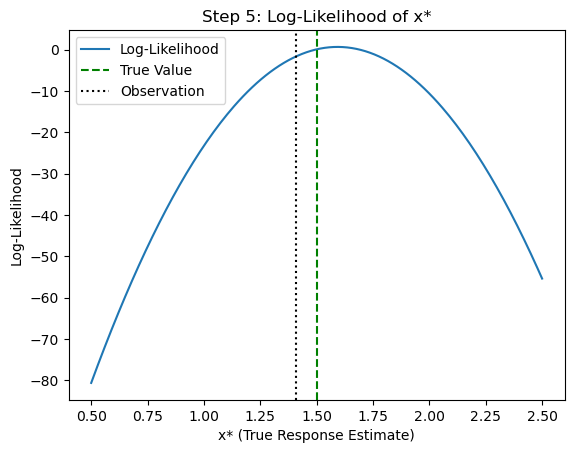

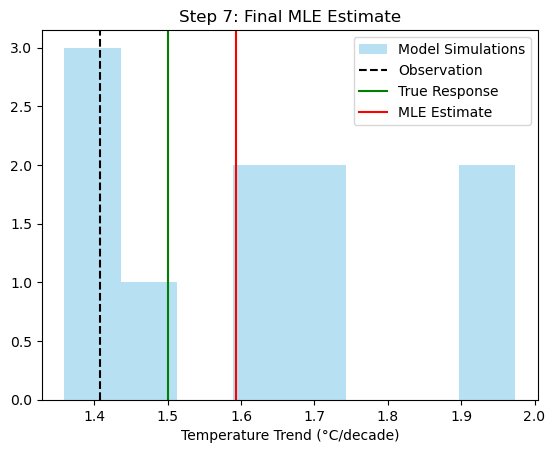

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Step 1: Simulate the "true" response and noise levels
np.random.seed(42)
x_true = 1.5                 # True climate response to a forcing
sigma_model = 0.3            # Uncertainty in model simulations
sigma_obs = 0.2              # Uncertainty in observations

# Step 2: Generate model simulations (e.g., 10 models)
x_model = np.random.normal(loc=x_true, scale=sigma_model, size=10)

# Step 3: Generate a single noisy observation
y_obs = np.random.normal(loc=x_true, scale=sigma_obs)

# Plot 1: Show model simulations and the observation
fig, ax = plt.subplots()
ax.hist(x_model, bins=8, alpha=0.6, label='Model Simulations', color='skyblue')
ax.axvline(y_obs, color='black', linestyle='--', label='Observation')
ax.axvline(x_true, color='green', linestyle='-', label='True Response')
ax.set_title('Step 1-3: Simulated Models and Observation')
ax.set_xlabel('Temperature Trend (°C/decade)')
ax.legend()
plt.show()

# Step 4: Define the negative log-likelihood function
def neg_log_likelihood(x_star):
    ll_model = np.sum(norm.logpdf(x_model, loc=x_star, scale=sigma_model))
    ll_obs = norm.logpdf(y_obs, loc=x_star, scale=sigma_obs)
    return -(ll_model + ll_obs)

# Step 5: Visualize the likelihood function over a range of x_star values
x_range = np.linspace(0.5, 2.5, 200)
log_likelihoods = [-neg_log_likelihood(x) for x in x_range]

fig, ax = plt.subplots()
ax.plot(x_range, log_likelihoods, label='Log-Likelihood')
ax.axvline(x_true, color='green', linestyle='--', label='True Value')
ax.axvline(y_obs, color='black', linestyle=':', label='Observation')
ax.set_title('Step 5: Log-Likelihood of x*')
ax.set_xlabel('x* (True Response Estimate)')
ax.set_ylabel('Log-Likelihood')
ax.legend()
plt.show()

# Step 6: Use numerical optimization to find MLE
result = minimize(neg_log_likelihood, x0=1.0)
x_star_mle = result.x[0]

# Step 7: Plot the final estimate alongside everything
fig, ax = plt.subplots()
ax.hist(x_model, bins=8, alpha=0.6, label='Model Simulations', color='skyblue')
ax.axvline(y_obs, color='black', linestyle='--', label='Observation')
ax.axvline(x_true, color='green', linestyle='-', label='True Response')
ax.axvline(x_star_mle, color='red', linestyle='-', label='MLE Estimate')
ax.set_title('Step 7: Final MLE Estimate')
ax.set_xlabel('Temperature Trend (°C/decade)')
ax.legend()
plt.show()
